In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import statsmodels.formula.api as smf
import lxml

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
# pd.options.display.float_format = '{:.4f}'.format

In [2]:
data = pd.read_csv('../raw_data/dreaddit-train.csv', parse_dates=True)
data_test = pd.read_csv('../raw_data/dreaddit-test.csv', parse_dates=True)

In [3]:
#data.columns.to_list()
cols_to_remove =  ['syntax_ari',
                   'syntax_fk_grade',
                   'lex_dal_max_pleasantness',
                   'lex_dal_max_activation',
                   'lex_dal_max_imagery',
                   'lex_dal_min_pleasantness',
                   'lex_dal_min_activation',
                   'lex_dal_min_imagery',
                   'lex_dal_avg_activation',
                   'lex_dal_avg_imagery',
                   'lex_dal_avg_pleasantness',
                   'sentiment',
                   'post_id']
data.drop(columns=cols_to_remove, inplace=True)

In [4]:
data['domain'] = data['subreddit'].map({'domesticviolence': 'abuse',
                                       'survivorsofabuse': 'abuse',
                                       'anxiety': 'anxiety',
                                       'stress': 'anxiety',
                                       'almosthomeless': 'ﬁnancial',
                                       'assistance': 'ﬁnancial',
                                       'food_pantry': 'ﬁnancial',
                                       'homeless':'ﬁnancial',
                                       'ptsd':'ptsd',
                                       'relationships':'social'
                                       })

In [5]:
data.isnull().sum().sort_values(ascending=True)
#no missing values in the data set

subreddit               0
lex_liwc_space          0
lex_liwc_motion         0
lex_liwc_relativ        0
lex_liwc_focusfuture    0
                       ..
lex_liwc_conj           0
lex_liwc_adverb         0
lex_liwc_auxverb        0
social_num_comments     0
domain                  0
Length: 104, dtype: int64

In [6]:
data.dtypes

subreddit               object
sentence_range          object
text                    object
id                       int64
label                    int64
                        ...   
lex_liwc_Parenth       float64
lex_liwc_OtherP        float64
social_upvote_ratio    float64
social_num_comments      int64
domain                  object
Length: 104, dtype: object

In [7]:
data['social_date'] = data['social_timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))
data = data.drop(columns='social_timestamp')

#### check distribution of characters within each Reddit post

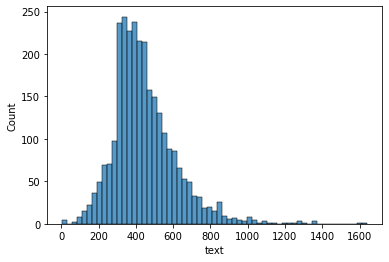

In [8]:
sns.histplot(data['text'].apply(lambda x: len(x)));

In [9]:
rows_to_remove = data['text'].apply(lambda x: len(x)).sort_values().head(5).index.to_list()
data.iloc[rows_to_remove]

,subreddit,sentence_range,text,id,label,confidence,social_karma,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,lex_liwc_Sixltr,lex_liwc_Dic,lex_liwc_function,lex_liwc_pronoun,lex_liwc_ppron,lex_liwc_i,lex_liwc_we,lex_liwc_you,lex_liwc_shehe,lex_liwc_they,lex_liwc_ipron,lex_liwc_article,lex_liwc_prep,lex_liwc_auxverb,lex_liwc_adverb,lex_liwc_conj,lex_liwc_negate,lex_liwc_verb,lex_liwc_adj,lex_liwc_compare,lex_liwc_interrog,lex_liwc_number,lex_liwc_quant,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lex_liwc_anx,lex_liwc_anger,lex_liwc_sad,lex_liwc_social,lex_liwc_family,lex_liwc_friend,lex_liwc_female,lex_liwc_male,lex_liwc_cogproc,lex_liwc_insight,lex_liwc_cause,...,lex_liwc_percept,lex_liwc_see,lex_liwc_hear,lex_liwc_feel,lex_liwc_bio,lex_liwc_body,lex_liwc_health,lex_liwc_sexual,lex_liwc_ingest,lex_liwc_drives,lex_liwc_affiliation,lex_liwc_achieve,lex_liwc_power,lex_liwc_reward,lex_liwc_risk,lex_liwc_focuspast,lex_liwc_focuspresent,lex_liwc_focusfuture,lex_liwc_relativ,lex_liwc_motion,lex_liwc_space,lex_liwc_time,lex_liwc_work,lex_liwc_leisure,lex_liwc_home,lex_liwc_money,lex_liwc_relig,lex_liwc_death,lex_liwc_informal,lex_liwc_swear,lex_liwc_netspeak,lex_liwc_assent,lex_liwc_nonflu,lex_liwc_filler,lex_liwc_AllPunc,lex_liwc_Period,lex_liwc_Comma,lex_liwc_Colon,lex_liwc_SemiC,lex_liwc_QMark,lex_liwc_Exclam,lex_liwc_Dash,lex_liwc_Quote,lex_liwc_Apostro,lex_liwc_Parenth,lex_liwc_OtherP,social_upvote_ratio,social_num_comments,domain,social_date
1592,anxiety,"[15, 20]",#NAME?,469,1,0.571429,3,9,74.89,13.32,4.97,1.0,9.0,44.44,100.00,11.11,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,11.11,0.00,11.11,0.00,0.00,0.0,0.00,11.11,0.00,11.11,0.00,0.00,11.11,0.00,0.00,0.00,0.00,0.00,11.11,11.11,0.00,...,22.22,0.00,0.00,22.22,44.44,11.11,11.11,0.0,22.22,11.11,0.00,11.11,0.00,0.00,11.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,11.11,0.0,0.0,0.0,0.0,0.0,0.0,55.56,0.00,0.00,0.0,0.0,0.0,0.0,55.56,0.0,0.00,0.0,0.0,1.00,7,anxiety,2018-01-28 04:36:40
295,domesticviolence,"(10, 15)",#NAME?,31315,0,0.800000,10,78,39.13,99.00,46.75,99.0,15.6,16.67,92.31,62.82,25.64,16.67,3.85,2.56,10.26,0.00,0.0,8.97,1.28,17.95,6.41,1.28,10.26,0.00,15.38,3.85,3.85,2.56,0.0,1.28,12.82,12.82,0.00,0.00,0.00,0.00,19.23,0.00,0.00,0.00,0.00,6.41,1.28,1.28,...,2.56,0.00,2.56,0.00,1.28,1.28,0.00,0.0,0.00,14.10,3.85,5.13,5.13,2.56,0.00,2.56,11.54,2.56,14.10,2.56,7.69,3.85,2.56,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,15.38,6.41,3.85,0.0,0.0,0.0,0.0,5.13,0.0,0.00,0.0,0.0,0.92,9,abuse,2017-12-08 09:21:17
2190,ptsd,"[30, 35]",#NAME?,559,1,1.000000,9,35,16.23,38.74,98.59,1.0,35.0,34.29,94.29,54.29,20.00,14.29,14.29,0.00,0.00,0.00,0.0,5.71,8.57,8.57,8.57,11.43,8.57,2.86,17.14,2.86,0.00,5.71,0.0,0.00,14.29,0.00,14.29,5.71,0.00,2.86,14.29,8.57,2.86,2.86,5.71,11.43,8.57,0.00,...,2.86,0.00,0.00,2.86,0.00,0.00,0.00,0.0,0.00,20.00,11.43,0.00,2.86,0.00,5.71,5.71,8.57,0.00,11.43,0.00,2.86,8.57,0.00,2.86,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,20.00,0.00,0.00,0.0,0.0,0.0,0.0,14.29,0.0,5.71,0.0,0.0,0.85,9,ptsd,2018-11-06 22:25:11
2563,domesticviolence,"(15, 20)",#NAME?,29201,0,0.800000,23,92,4.30,99.00,1.00,99.0,18.4,15.22,96.74,60.87,23.91,19.57,0.00,0.00,7.61,11.96,0.0,4.35,1.09,9.78,11.96,8.70,10.87,0.00,20.65,6.52,3.26,5.43,0.0,1.09,14.13,10.87,3.26,0.00,2.17,0.00,30.43,1.09,0.00,1.09,11.96,15.22,4.35,1.09,...,8.70,5.43,1.09,2.17,1.09,0.00,1.09,0.0,0.00,6.52,2.17,2.17,1.09,3.26,0.00,0.00,13.04,8.70,11.96,0.00,5.43,6.52,0.00,1.09,1.09,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,13.04,5.43,3.26,0.0,0.0,0.0,0.0,4.35,0.0,0.00,0.0,0.0,1.00,4,abuse,2018-05-25 13:55:30
854,assistance,"[10, 15]",<url> Resume: <url> Thank you! !,806,0,0.571429,16,5,51.43,99.00,1.00,99.0,5.0,0.00,60.00,20.00,20.00,20.00,0.00,0.00,20.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.0,0.00,20.00,20.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0

In [10]:
data.shape

(2838, 104)

In [11]:
data.drop(labels=rows_to_remove, inplace=True )
data.shape

(2833, 104)

In [12]:
data['pct_caps'] = data['text'].apply(lambda x: sum([char.isupper() for char in x])/len(x) )
data['text'] = data['text'].apply(lambda x: x.lower())

#### comparison on Naive Bayes using TF-iDF vs. LIWC vectorizer

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data['text'])

y = data['label']

nb_model = MultinomialNB()

nb_model.fit(X,y)


MultinomialNB()

In [14]:
data_test.drop(columns=cols_to_remove, inplace=True)

data_test['domain'] = data_test['subreddit'].map({'domesticviolence': 'abuse',
                                                   'survivorsofabuse': 'abuse',
                                                   'anxiety': 'anxiety',
                                                   'stress': 'anxiety',
                                                   'almosthomeless': 'ﬁnancial',
                                                   'assistance': 'ﬁnancial',
                                                   'food_pantry': 'ﬁnancial',
                                                   'homeless':'ﬁnancial',
                                                   'ptsd':'ptsd',
                                                   'relationships':'social'
                                                   })

data_test['social_date'] = data_test['social_timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))
data_test = data_test.drop(columns='social_timestamp')

data_test['pct_caps'] = data_test['text'].apply(lambda x: sum([char.isupper() for char in x])/len(x) )
data_test['text'] = data_test['text'].apply(lambda x: x.lower())

In [15]:
y_test = data_test['label']

X_test = vectorizer.transform(data_test['text'])

nb_model.score(X_test,y_test)

0.6461538461538462

In [16]:
non_liwc_cols = ['subreddit', 
                 'sentence_range', 
                 'text', 
                 'id', 
                 'label', 
                 'confidence', 
                 'social_karma', 
                 'social_upvote_ratio',
                 'social_num_comments', 
                 'domain', 
                 'social_date',
                 'pct_caps']

X_liwc = data.drop(columns=non_liwc_cols) 
nb_model1 = MultinomialNB()
nb_model1.fit(X_liwc,y)

MultinomialNB()

In [17]:
X_liwc_test = data_test.drop(columns=non_liwc_cols)
nb_model1.score(X_liwc_test,y_test)

0.7412587412587412

In [18]:
log_reg_drop =  ['subreddit', 
                 'sentence_range', 
                 'text', 
                 'id', 
                 'label', 
                 'confidence',
                 'social_date',
                 'domain']
log_reg_X = data.drop(columns= log_reg_drop)

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10_000)

log_reg.fit(X=X_liwc, y=data['label'], sample_weight=data['confidence'])

LogisticRegression(max_iter=10000)

In [20]:
log_reg.score(X_liwc_test,y_test)

0.7426573426573426

In [21]:
log_reg1 = LogisticRegression(max_iter=10_000)

log_reg1.fit(X=log_reg_X, y=data['label'], sample_weight=data['confidence'])

LogisticRegression(max_iter=10000)

In [22]:
log_reg_X_test = data_test.drop(columns=log_reg_drop)
log_reg1.score(log_reg_X_test,y_test)

0.7468531468531469

## Feature Selection

In [23]:
data.shape

(2833, 105)

In [24]:
data['id'].nunique()
data.set_index('id',inplace=True)

In [25]:
data['domain_label'] = data['domain'].map({'ptsd':1,
                                           'ﬁnancial':2,
                                           'social':3,
                                           'abuse':4,
                                           'anxiety':5
                                            })



In [26]:
eda_data = data.drop(columns=['text','subreddit','domain'])
eda_data.head(2)
all_features = eda_data.drop(columns=['label','domain_label','confidence', 'sentence_range','social_date' ])
all_features

,social_karma,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,lex_liwc_Sixltr,lex_liwc_Dic,lex_liwc_function,lex_liwc_pronoun,lex_liwc_ppron,lex_liwc_i,lex_liwc_we,lex_liwc_you,lex_liwc_shehe,lex_liwc_they,lex_liwc_ipron,lex_liwc_article,lex_liwc_prep,lex_liwc_auxverb,lex_liwc_adverb,lex_liwc_conj,lex_liwc_negate,lex_liwc_verb,lex_liwc_adj,lex_liwc_compare,lex_liwc_interrog,lex_liwc_number,lex_liwc_quant,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lex_liwc_anx,lex_liwc_anger,lex_liwc_sad,lex_liwc_social,lex_liwc_family,lex_liwc_friend,lex_liwc_female,lex_liwc_male,lex_liwc_cogproc,lex_liwc_insight,lex_liwc_cause,lex_liwc_discrep,lex_liwc_tentat,lex_liwc_certain,lex_liwc_differ,lex_liwc_percept,lex_liwc_see,lex_liwc_hear,lex_liwc_feel,lex_liwc_bio,lex_liwc_body,lex_liwc_health,lex_liwc_sexual,lex_liwc_ingest,lex_liwc_drives,lex_liwc_affiliation,lex_liwc_achieve,lex_liwc_power,lex_liwc_reward,lex_liwc_risk,lex_liwc_focuspast,lex_liwc_focuspresent,lex_liwc_focusfuture,lex_liwc_relativ,lex_liwc_motion,lex_liwc_space,lex_liwc_time,lex_liwc_work,lex_liwc_leisure,lex_liwc_home,lex_liwc_money,lex_liwc_relig,lex_liwc_death,lex_liwc_informal,lex_liwc_swear,lex_liwc_netspeak,lex_liwc_assent,lex_liwc_nonflu,lex_liwc_filler,lex_liwc_AllPunc,lex_liwc_Period,lex_liwc_Comma,lex_liwc_Colon,lex_liwc_SemiC,lex_liwc_QMark,lex_liwc_Exclam,lex_liwc_Dash,lex_liwc_Quote,lex_liwc_Apostro,lex_liwc_Parenth,lex_liwc_OtherP,social_upvote_ratio,social_num_comments,pct_caps
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
33181,5,116,72.64,15.04,89.26,1.00,29.00,12.93,87.07,56.03,16.38,12.07,9.48,0.00,0.86,1.72,0.00,4.31,3.45,19.83,7.76,5.17,4.31,1.72,16.38,6.03,3.45,0.86,1.72,1.72,8.62,1.72,6.90,0.86,2.59,3.45,3.45,0.00,0.00,0.00,1.72,11.21,3.45,0.86,2.59,5.17,0.00,2.59,6.03,1.72,1.72,1.72,2.59,0.86,1.72,0.00,0.00,8.62,0.00,1.72,4.31,0.86,2.59,4.31,11.21,0.86,17.24,0.86,10.34,6.03,0.86,0.00,0.00,0.00,2.59,0.00,0.86,0.86,0.00,0.00,0.00,0.0,21.55,9.48,3.45,0.86,0.86,0.00,0.0,0.00,5.17,1.72,0.00,0.00,0.86,1,0.084063
2606,4,109,79.08,76.85,56.75,98.18,27.25,21.10,87.16,48.62,11.93,7.34,1.83,2.75,2.75,0.00,0.00,4.59,8.26,13.76,6.42,3.67,8.26,0.92,15.60,2.75,0.92,0.92,2.75,0.92,5.50,5.50,0.00,0.00,0.00,0.00,11.01,0.00,0.00,0.00,0.00,11.93,1.83,0.00,3.67,5.50,1.83,6.42,0.92,0.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.60,5.50,3.67,7.34,2.75,0.00,0.92,13.76,0.92,15.60,2.75,10.09,1.83,11.01,0.00,0.00,0.92,0.00,0.00,1.83,0.00,0.92,0.00,0.00,0.0,14.68,4.59,2.75,0.00,0.00,0.00,0.0,0.00,0.00,2.75,0.92,3.67,0.65,2,0.037415
38816,2,167,33.80,76.38,86.24,25.77,33.40,17.37,91.02,61.68,25.15,16.17,8.98,1.80,1.80,2.99,0.60,8.98,5.39,12.57,10.18,1.80,5.99,1.20,20.96,1.20,0.60,0.60,1.20,1.80,2.40,1.20,1.20,0.00,0.00,0.00,15.57,0.60,3.59,1.80,2.40,10.18,4.19,1.20,0.60,2.99,0.00,1.80,0.00,0.00,0.00,0.00,0.60,0.60,0.00,0.00,0.00,8.98,5.39,0.60,1.20,2.40,0.00,3.59,14.37,1.80,16.17,4.79,5.99,5.39,0.00,1.20,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,10.78,2.40,3.59,0.00,0.00,0.60,0.0,0.00,2.40,1.80,0.00,0.00,0.67,0,0.012987
239,0,273,2.98,15.25,95.42,79.26,54.60,8.06,98.90,65.57,30.40,23.44,16.12,0.37,0.37,6.59,0.00,6.96,3.30,9.16,8.79,6.59,9.89,3.66,20.88,3.66,1.83,1.10,0.00,1.10,8.79,5.86,2.93,0.00,0.37,0.73,13.55,0.37,1.10,0.37,8.06,16.85,7.69,0.73,1.83,1.83,1.47,4.76,7.33,1.10,0.00,5.49,2.20,0.00,0.00,0.37,0.37,6.59,4.03,0.00,0.73,1.10,0.73,7.69,13.19,1.10,10.99,1.83,3.30,6.23,0.73,0.37,0.37,0.00,0.00,0.00,2.56,0.00,0.73,0.73,0.00,0.0,12.09,2.56,7.33,0.00,0.00,0.00,0.0,0.00,1.47,0.00,0.73,0.00,0.50,5,0.009397
1421,24,89,32.22,28.71,84.01,1.00,17.80,31.46,88.76,52.81,15.73,11.24,7.87,0.00,0.00,3.37,0.00,4.49,4.49,8.99,13.48,4.49,4.49,2.25,13.48,4.49,2.25,1.12,1.12,1.12,7.87,0.00,7.87,1.12,4.49,0.00,8.99,0.00,0.00,0.00,4.49,11.24,3.37,2.25,0.00,0.00,1.12,4.49,2.25,0.00,0.00,2.25,2.25,0.00,1.12,1.12,0.00,7.87,0.00,2.25,4.49,0.00,1.12,5.62,6.74,0.00,14.61,2.25,2.25,10.11,1.12,0.00,2

In [27]:
from sklearn.feature_selection import mutual_info_classif

MI = mutual_info_classif(all_features,data['label'])

In [28]:
headers = all_features.columns

In [29]:
MI_vars = pd.Series(index=headers, data=MI).sort_values(ascending=False)

In [30]:
MI_vars_selected = MI_vars[MI_vars>0]
MI_vars_selected.shape

(79,)

In [31]:
features_post_MI = all_features[MI_vars_selected.index]

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

    return vif

In [33]:
VIF_df = calc_vif(features_post_MI)

In [34]:
VIF_df.sort_values(by='VIF', ascending=True, inplace=True )
VIF_vars_selected = VIF_df[VIF_df['VIF']<15]
VIF_vars_selected.shape

(44, 2)

In [35]:
features_post_VIF = features_post_MI[VIF_vars_selected['variables']]
features_post_VIF.columns

Index(['lex_liwc_SemiC', 'lex_liwc_Exclam', 'lex_liwc_sexual',
       'lex_liwc_leisure', 'lex_liwc_home', 'lex_liwc_Dash', 'lex_liwc_friend',
       'lex_liwc_focusfuture', 'lex_liwc_nonflu', 'lex_liwc_QMark',
       'lex_liwc_sad', 'lex_liwc_work', 'lex_liwc_assent', 'lex_liwc_body',
       'lex_liwc_certain', 'social_karma', 'lex_liwc_interrog',
       'lex_liwc_feel', 'lex_liwc_cause', 'social_num_comments',
       'lex_liwc_risk', 'lex_liwc_family', 'lex_liwc_anx', 'lex_liwc_quant',
       'lex_liwc_percept', 'lex_liwc_anger', 'lex_liwc_health',
       'lex_liwc_achieve', 'lex_liwc_discrep', 'lex_liwc_netspeak',
       'lex_liwc_adj', 'lex_liwc_reward', 'lex_liwc_swear', 'lex_liwc_WPS',
       'lex_liwc_insight', 'lex_liwc_negate', 'lex_liwc_Comma',
       'lex_liwc_Tone', 'lex_liwc_bio', 'lex_liwc_motion', 'lex_liwc_power',
       'lex_liwc_Apostro', 'lex_liwc_focuspast', 'lex_liwc_Sixltr'],
      dtype='object')

In [36]:
corr= features_post_VIF.corr()
df_s = corr.copy()

def style_negative(v, props=''):
    return props if v < 0 else None
s=df_s.style.applymap(style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.5) and (v > -0.5) else None)
s


,lex_liwc_SemiC,lex_liwc_Exclam,lex_liwc_sexual,lex_liwc_leisure,lex_liwc_home,lex_liwc_Dash,lex_liwc_friend,lex_liwc_focusfuture,lex_liwc_nonflu,lex_liwc_QMark,lex_liwc_sad,lex_liwc_work,lex_liwc_assent,lex_liwc_body,lex_liwc_certain,social_karma,lex_liwc_interrog,lex_liwc_feel,lex_liwc_cause,social_num_comments,lex_liwc_risk,lex_liwc_family,lex_liwc_anx,lex_liwc_quant,lex_liwc_percept,lex_liwc_anger,lex_liwc_health,lex_liwc_achieve,lex_liwc_discrep,lex_liwc_netspeak,lex_liwc_adj,lex_liwc_reward,lex_liwc_swear,lex_liwc_WPS,lex_liwc_insight,lex_liwc_negate,lex_liwc_Comma,lex_liwc_Tone,lex_liwc_bio,lex_liwc_motion,lex_liwc_power,lex_liwc_Apostro,lex_liwc_focuspast,lex_liwc_Sixltr
lex_liwc_SemiC,1.000000,0.004961,0.025635,0.033977,-0.023978,0.155873,0.102172,-0.025417,-0.002943,0.068859,0.048608,0.014622,-0.016408,-0.045138,-0.000131,0.008195,0.039300,-0.035399,0.008231,0.035539,0.005781,-0.032130,-0.015179,0.008639,-0.051051,0.094540,0.090708,0.029601,0.022038,0.080843,-0.040162,-0.019687,0.002162,-0.014316,0.012664,-0.007418,-0.020145,0.024617,0.042418,-0.055519,0.110942,0.016600,-0.095659,0.034656
lex_liwc_Exclam,0.004961,1.000000,-0.026126,0.018191,-0.006373,0.006904,-0.018301,0.053812,0.034328,0.010504,-0.071067,0.059553,-0.005696,-0.029849,-0.015861,-0.019692,-0.030303,-0.045749,-0.050030,-0.012846,-0.053170,-0.059580,-0.059362,0.049376,-0.017026,-0.029630,-0.051885,0.072439,0.090744,0.103241,-0.001670,0.043623,0.030667,-0.077788,-0.009991,-0.060819,0.013133,0.161798,-0.058989,0.003753,0.016239,-0.007907,-0.084696,0.011744
lex_liwc_sexual,0.025635,-0.026126,1.000000,-0.037528,-0.010315,0.007698,0.011091,-0.039020,0.014472,-0.006088,-0.022592,-0.084449,0.000075,0.060146,0.024938,0.038736,0.006404,0.045119,0.004818,0.039520,-0.033861,0.002397,-0.031885,-0.022620,0.028888,0.302247,-0.013544,-0.064225,-0.007571,-0.020186,0.050514,-0.047211,0.407376,0.009909,-0.017674,-0.015126,-0.001952,-0.095620,0.224265,-0.044942,-0.000726,-0.010411,0.041049,-0.003261
lex_liwc_leisure,0.033977,0.018191,-0.037528,1.000000,0.173477,0.035207,0.068627,-0.012853,-0.002514,-0.006468,-0.061761,-0.032415,0.050416,0.006360,-0.026290,0.013478,-0.045079,-0.070152,-0.047799,0.043621,-0.072293,0.101932,-0.068820,-0.012734,0.004815,-0.011422,-0.031258,0.003435,-0.048030,0.068718,-0.045093,-0.043930,-0.015698,-0.008829,-0.101787,-0.073531,0.018255,0.113625,0.054734,0.041758,-0.040043,-0.037094,-0.015145,0.035929
lex_liwc_home,-0.023978,-0.006373,-0.010315,0.173477,1.000000,0.003203,0.035510,-0.020767,-0.010450,-0.046972,-0.006286,-0.030803,-0.028350,0.038180,-0.057101,0.027826,-0.063349,-0.097884,-0.090491,0.047545,-0.026981,0.231562,-0.087520,-0.088333,-0.087860,-0.015197,-0.056458,-0.044582,-0.052614,-0.040412,-0.063504,-0.025118,0.017093,-0.012409,-0.170967,-0.012694,0.001125,-0.063477,-0.006284,0.133818,-0.005791,-0.027451,0.030627,-0.066684
lex_liwc_Dash,0.155873,0.006904,0.007698,0.035207,0.003203,1.000000,0.055277,0.007406,-0.006002,0.037228,-0.034997,0.008804,0.011453,-0.033956,-0.023782,0.005861,-0.000442,-0.026069,-0.000714,0.055502,-0.027665,0.041109,-0.039910,0.003909,-0.040320,-0.065649,0.006870,-0.031153,0.021075,0.005950,-0.003845,-0.042514,-0.047191,-0.014846,-0.046292,-0.047348,0.000439,0.060926,0.102007,-0.034553,0.071698,-0.023481,-0.101908,0.133613
lex_liwc_friend,0.102172,-0.018301,0.011091,0.068627,0.035510,0.055277,1.000000,-0.048257,-0.000549,-0.004435,-0.047059,-0.096346,0.008845,-0.066629,-0.035222,0.027705,0.000130,-0.037399,-0.024625,0.073983,-0.049137,-0.000124,-0.081717,-0.012892,-0.051056,-0.019524,-0.076267,-0.012440,-0.038042,0.070644,0.017533,-0.026534,-0.033150,-0.001159,-0.077517,-0.031939,-0.008426,0.061507,-0.072929,0.007480,0.003315,-0.032743,0.070646,-0.039741
lex_liwc_focusfuture,-0.025417,0.053812,-0.039020,-0.012853,-0.020767,0.007406,-0.048257,1.000000,-0.001215,-0.003420,-0.052500,0.044249,0.009540,-0.051604,-0.017014,0.005516,-0.023285,-0.082317,-0.016431,-0.006591,0.013635,-0.066397,-0.027473,0.018734,-0.04819

In [37]:
# pal=sns.diverging_palette(150, 10 ,s=90, l=25, as_cmap=True)
# plt.figure(figsize=(20,20))
# sns.heatmap(features_post_VIF.corr(), vmin=-1, vmax=1, cmap='coolwarm' );

In [38]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head(4)

,feature_1,feature_2,correlation
851,social_num_comments,social_karma,0.794533
679,social_karma,social_num_comments,0.794533
1182,lex_liwc_health,lex_liwc_bio,0.681274
1698,lex_liwc_bio,lex_liwc_health,0.681274


In [39]:
MI_vars[corr_df.head(4)['feature_1'].to_list()]

social_num_comments    0.020473
social_karma           0.008135
lex_liwc_health        0.006945
lex_liwc_bio           0.012647
dtype: float64

In [40]:
features_post_VIF.columns

Index(['lex_liwc_SemiC', 'lex_liwc_Exclam', 'lex_liwc_sexual',
       'lex_liwc_leisure', 'lex_liwc_home', 'lex_liwc_Dash', 'lex_liwc_friend',
       'lex_liwc_focusfuture', 'lex_liwc_nonflu', 'lex_liwc_QMark',
       'lex_liwc_sad', 'lex_liwc_work', 'lex_liwc_assent', 'lex_liwc_body',
       'lex_liwc_certain', 'social_karma', 'lex_liwc_interrog',
       'lex_liwc_feel', 'lex_liwc_cause', 'social_num_comments',
       'lex_liwc_risk', 'lex_liwc_family', 'lex_liwc_anx', 'lex_liwc_quant',
       'lex_liwc_percept', 'lex_liwc_anger', 'lex_liwc_health',
       'lex_liwc_achieve', 'lex_liwc_discrep', 'lex_liwc_netspeak',
       'lex_liwc_adj', 'lex_liwc_reward', 'lex_liwc_swear', 'lex_liwc_WPS',
       'lex_liwc_insight', 'lex_liwc_negate', 'lex_liwc_Comma',
       'lex_liwc_Tone', 'lex_liwc_bio', 'lex_liwc_motion', 'lex_liwc_power',
       'lex_liwc_Apostro', 'lex_liwc_focuspast', 'lex_liwc_Sixltr'],
      dtype='object')

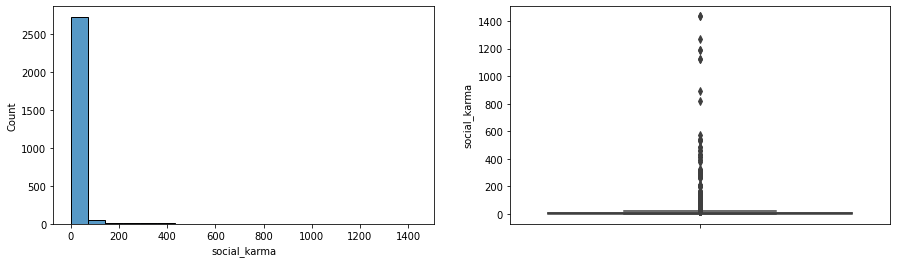

In [41]:
fig, axs = plt.subplots(1,2,figsize=(15,4))

sns.histplot(x=features_post_VIF['social_karma'],ax=axs[0], bins=20)
sns.boxplot(y=features_post_VIF['social_karma'], ax=axs[1]);

In [42]:
#we decide to cap at 200 as not many observations above that value
features_post_VIF['social_karma_cap'] = features_post_VIF['social_karma'].apply(lambda x: 200 if x>200 else x)

/var/folders/f2/9xrxtpw920x5zr_wkns47k_h0000gn/T/ipykernel_2325/3047159839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_post_VIF['social_karma_cap'] = features_post_VIF['social_karma'].apply(lambda x: 200 if x>200 else x)


In [43]:
features_post_VIF['social_num_comments'].sort_values(ascending=False).head(20)
#we decide to cap at 200 as not many observations above that value

id
167      416
712      318
26737    318
12226    292
16802    292
838      287
17541    276
17624    259
727      178
7446     164
27972    158
22262    158
1637     135
1789     134
2330     131
30252    131
19691    123
2354     110
53650    110
70       107
Name: social_num_comments, dtype: int64

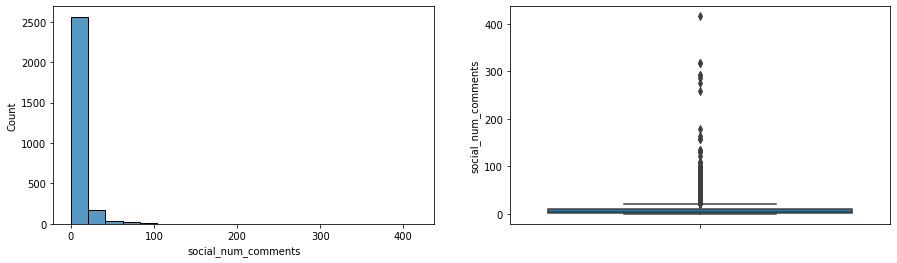

In [44]:
fig, axs = plt.subplots(1,2,figsize=(15,4))

sns.histplot(x=features_post_VIF['social_num_comments'],ax=axs[0], bins=20)
sns.boxplot(y=features_post_VIF['social_num_comments'], ax=axs[1]);

In [45]:
features_post_VIF['social_num_comments_cap'] = features_post_VIF['social_num_comments'].apply(lambda x: 100 if x>100 else x)

/var/folders/f2/9xrxtpw920x5zr_wkns47k_h0000gn/T/ipykernel_2325/3118160077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_post_VIF['social_num_comments_cap'] = features_post_VIF['social_num_comments'].apply(lambda x: 100 if x>100 else x)


In [46]:
features_post_VIF.drop(columns=['social_karma' , 'social_num_comments'], inplace=True)

/var/folders/f2/9xrxtpw920x5zr_wkns47k_h0000gn/T/ipykernel_2325/2997674704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_post_VIF.drop(columns=['social_karma' , 'social_num_comments'], inplace=True)


In [47]:
features_post_VIF.columns

Index(['lex_liwc_SemiC', 'lex_liwc_Exclam', 'lex_liwc_sexual',
       'lex_liwc_leisure', 'lex_liwc_home', 'lex_liwc_Dash', 'lex_liwc_friend',
       'lex_liwc_focusfuture', 'lex_liwc_nonflu', 'lex_liwc_QMark',
       'lex_liwc_sad', 'lex_liwc_work', 'lex_liwc_assent', 'lex_liwc_body',
       'lex_liwc_certain', 'lex_liwc_interrog', 'lex_liwc_feel',
       'lex_liwc_cause', 'lex_liwc_risk', 'lex_liwc_family', 'lex_liwc_anx',
       'lex_liwc_quant', 'lex_liwc_percept', 'lex_liwc_anger',
       'lex_liwc_health', 'lex_liwc_achieve', 'lex_liwc_discrep',
       'lex_liwc_netspeak', 'lex_liwc_adj', 'lex_liwc_reward',
       'lex_liwc_swear', 'lex_liwc_WPS', 'lex_liwc_insight', 'lex_liwc_negate',
       'lex_liwc_Comma', 'lex_liwc_Tone', 'lex_liwc_bio', 'lex_liwc_motion',
       'lex_liwc_power', 'lex_liwc_Apostro', 'lex_liwc_focuspast',
       'lex_liwc_Sixltr', 'social_karma_cap', 'social_num_comments_cap'],
      dtype='object')

### Min Max Scalling 

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [50]:
X_scaled_array = scaler.fit_transform(features_post_VIF)

In [51]:
df_X_scaled = pd.DataFrame(columns = features_post_VIF.columns,
                           index = features_post_VIF.index,
                           data = X_scaled_array)

In [52]:
df_X_scaled.shape

(2833, 44)

In [53]:
smf_data = df_X_scaled.join(data['label'])

### Statsmodels

In [54]:
smf_log_reg_results = smf.ols(formula = 'label' + " ~ " +  " + ".join(smf_data.columns[:-1]), data=smf_data).fit().summary()

In [55]:
 smf_log_reg_results.tables[0]

Dep. Variable:,label,R-squared:,0.300
Model:,OLS,Adj. R-squared:,0.289
Method:,Least Squares,F-statistic:,27.20
Date:,"Thu, 24 Feb 2022",Prob (F-statistic):,1.51e-181
Time:,20:35:05,Log-Likelihood:,-1546.8
No. Observations:,2833,AIC:,3184.
Df Residuals:,2788,BIC:,3451.
Df Model:,44,,
Covariance Type:,nonrobust,,


In [56]:
 smf_log_reg_results.tables[2]

Omnibus:,449.638,Durbin-Watson:,1.998
Prob(Omnibus):,0.000,Jarque-Bera (JB):,108.073
Skew:,-0.112,Prob(JB):,3.41e-24
Kurtosis:,2.070,Cond. No.,60.7


In [57]:
results_as_html = smf_log_reg_results.tables[1].as_html()
smf_results = pd.read_html(results_as_html, header=0, index_col=0)[0]
smf_results = smf_results[smf_results['P>|t|']<0.05].sort_values(by='P>|t|')
smf_results

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.6073,0.058,10.528,0.000,0.494,0.720
lex_liwc_focuspast,-0.2675,0.056,-4.745,0.000,-0.378,-0.157
lex_liwc_Apostro,0.3103,0.083,3.723,0.000,0.147,0.474
lex_liwc_Tone,-0.3746,0.030,-12.694,0.000,-0.432,-0.317
lex_liwc_Comma,-0.4834,0.120,-4.039,0.000,-0.718,-0.249
lex_liwc_WPS,0.8475,0.196,4.318,0.000,0.463,1.232
lex_liwc_health,0.3714,0.102,3.646,0.000,0.172,0.571
lex_liwc_percept,-0.2825,0.081,-3.487,0.000,-0.441,-0.124
lex_liwc_Sixltr,-0.4778,0.108,-4.429,0.000,-0.689,-0.266
lex_liwc_anx,0.8556,0.157,5.442,0.000,0.547,1.164


In [58]:
smf_results.rename(index={'social_karma_cap':'social_karma'}, inplace=True)

In [59]:
sign_feat_list = smf_results[smf_results['P>|t|']<0.05].sort_values(by='P>|t|').index
len(sign_feat_list[1:]) #exclude the intercept

25

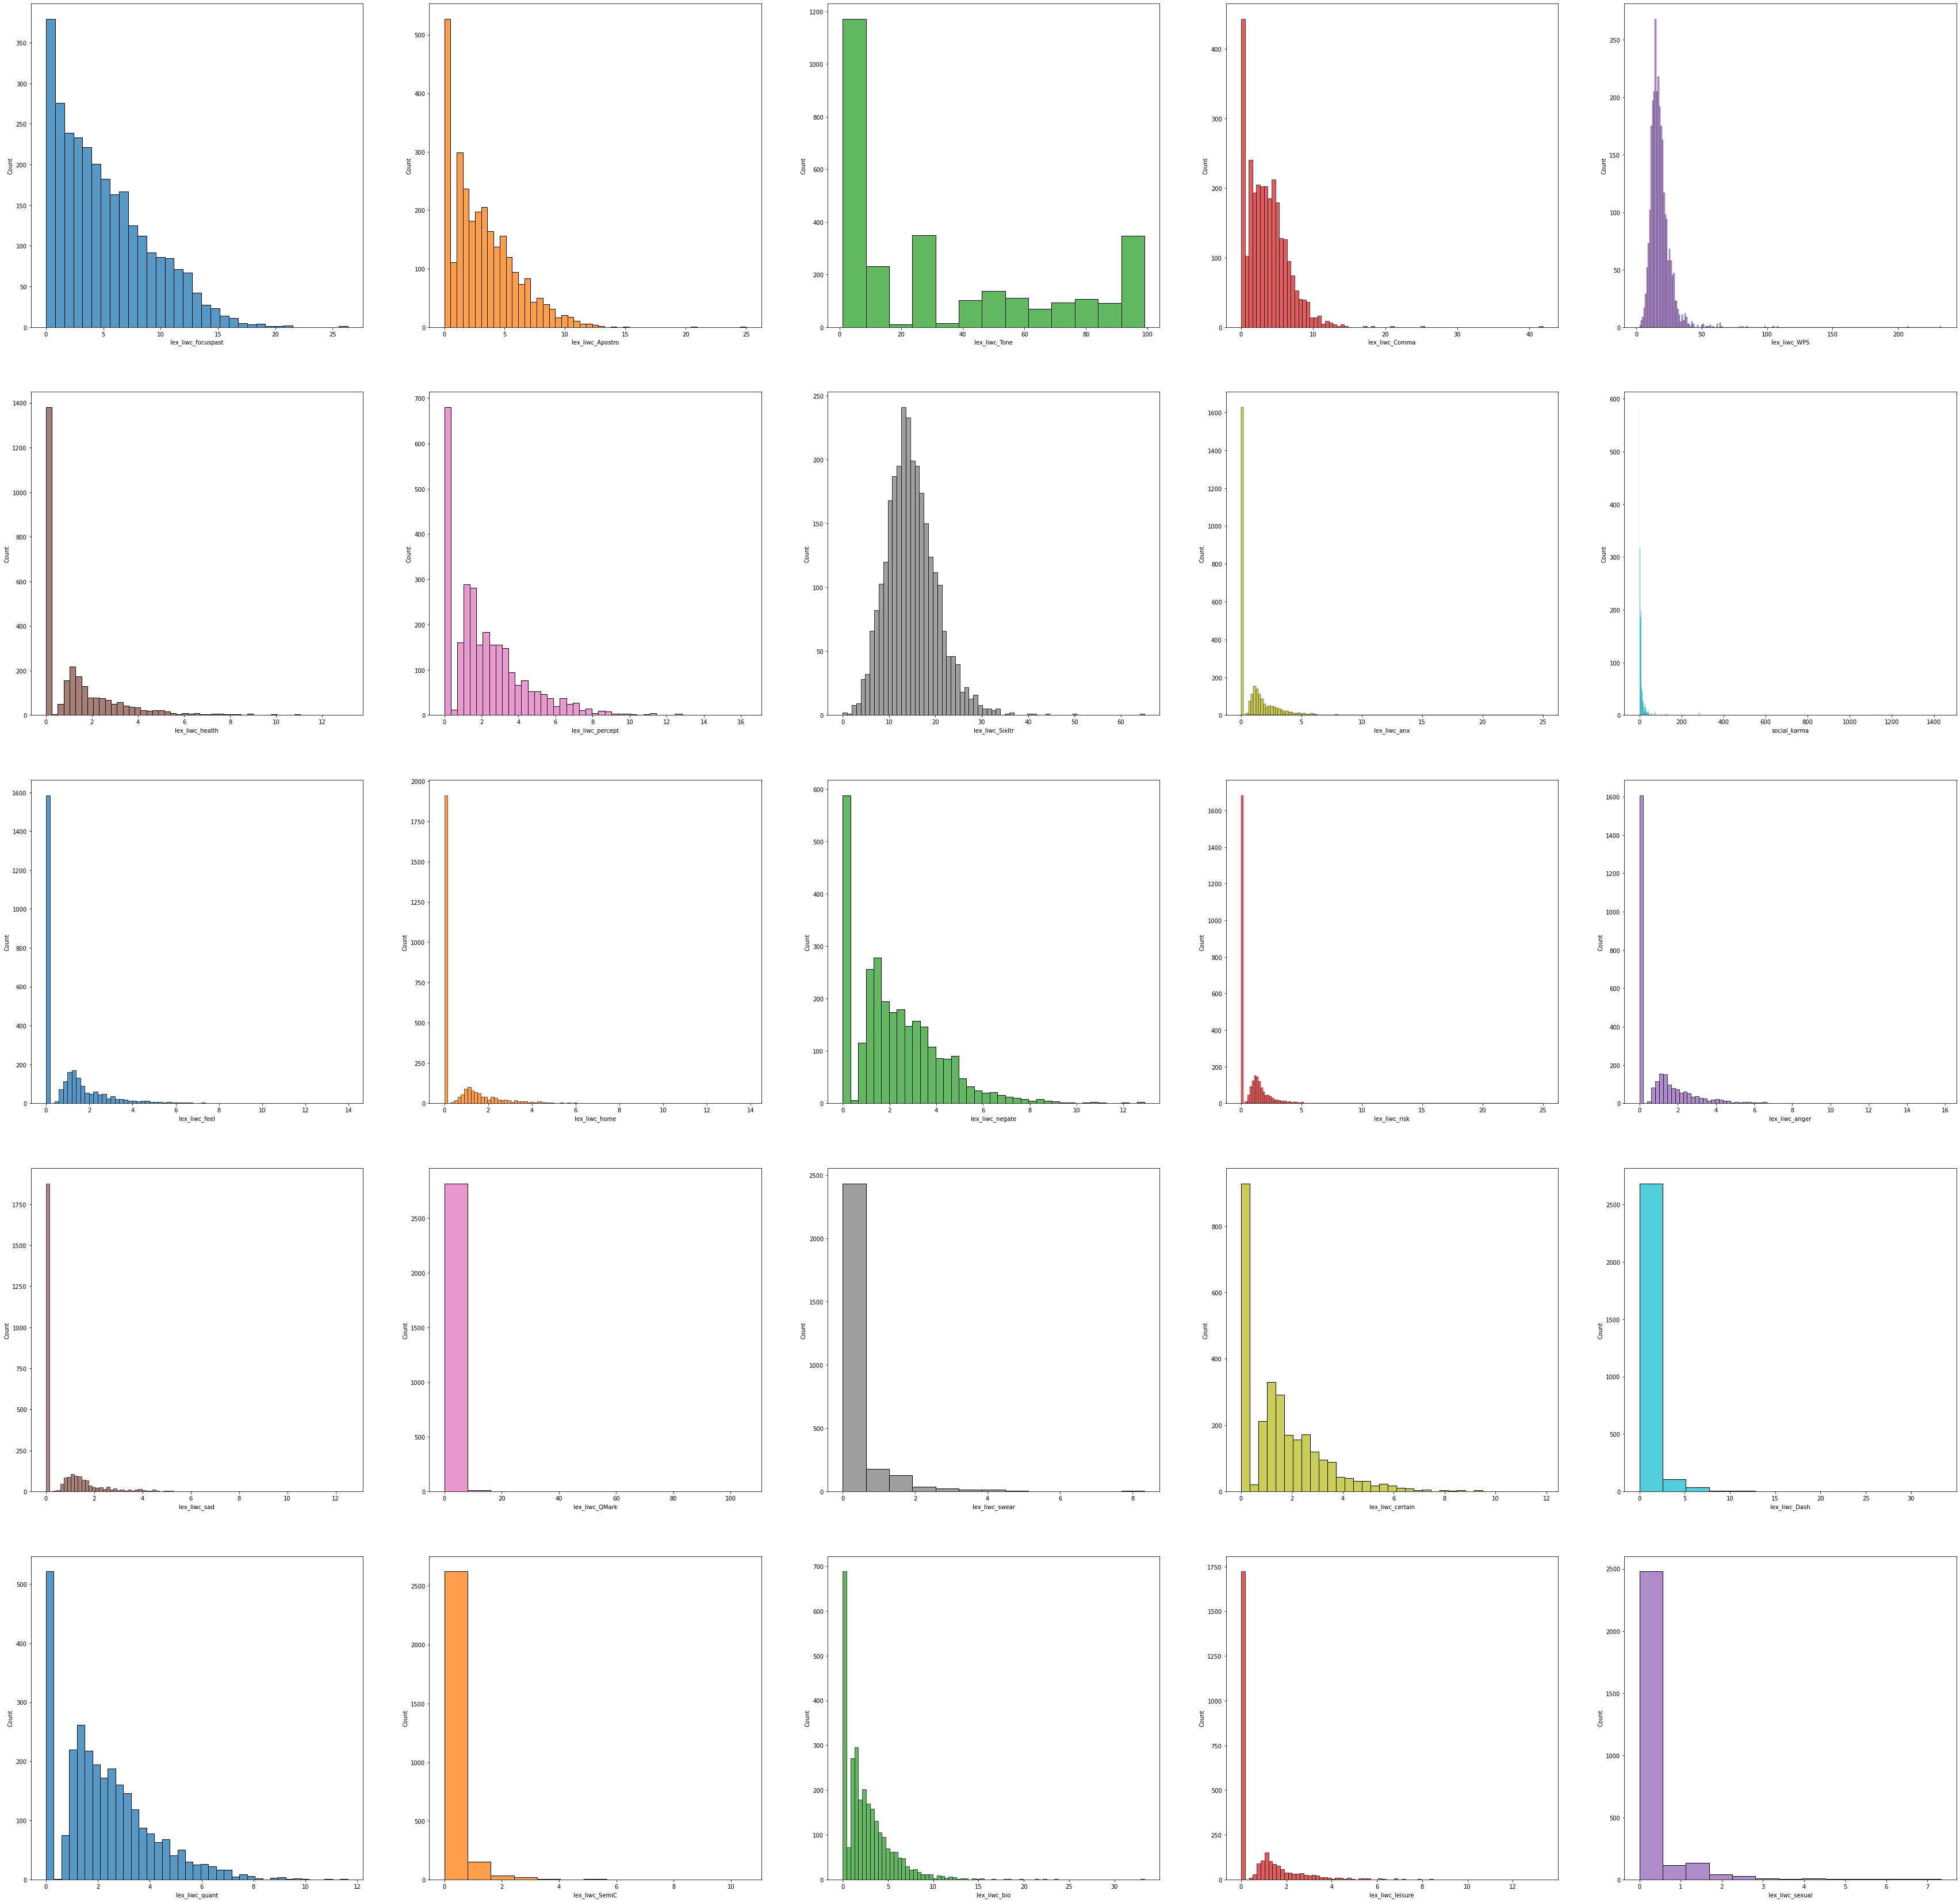

In [74]:
fig, axs = plt.subplots(nrows=5,ncols=5,figsize=(60,60) )
pal = sns.color_palette(palette=None, n_colors=len(sign_feat_list[1:]))

for (i,f,c) in zip(axs.flatten(),sign_feat_list[1:], pal):
    sns.histplot(data[f], ax=i, color=c)

In [63]:
for n in zip(axs.flatten(),sign_feat_list[1:], pal):
    print(n)

(<AxesSubplot:ylabel='Count'>, 'lex_liwc_focuspast', (0.12156862745098039, 0.4666666666666667, 0.7058823529411765))
(<AxesSubplot:ylabel='Count'>, 'lex_liwc_Apostro', (1.0, 0.4980392156862745, 0.054901960784313725))
(<AxesSubplot:ylabel='Count'>, 'lex_liwc_Tone', (0.17254901960784313, 0.6274509803921569, 0.17254901960784313))
(<AxesSubplot:>, 'lex_liwc_Comma', (0.8392156862745098, 0.15294117647058825, 0.1568627450980392))
(<AxesSubplot:>, 'lex_liwc_WPS', (0.5803921568627451, 0.403921568627451, 0.7411764705882353))
(<AxesSubplot:>, 'lex_liwc_health', (0.5490196078431373, 0.33725490196078434, 0.29411764705882354))
(<AxesSubplot:>, 'lex_liwc_percept', (0.8901960784313725, 0.4666666666666667, 0.7607843137254902))
(<AxesSubplot:>, 'lex_liwc_Sixltr', (0.4980392156862745, 0.4980392156862745, 0.4980392156862745))
(<AxesSubplot:>, 'lex_liwc_anx', (0.7372549019607844, 0.7411764705882353, 0.13333333333333333))
(<AxesSubplot:>, 'social_karma', (0.09019607843137255, 0.7450980392156863, 0.8117647058

In [ ]:
#remaining from the Descision Science section 
#- check the p-values and build a story 
#- word clouds by domain or by label or both (domain makes sense as people will talk differently)
#-visualize the distributions of the variables left after statsmodels - label 0 vs 1 
# -- visualize the ones with outliers (social vars) on log scale if needed

In [ ]:
# #Wordcloud
# order_reviews_c=data['order_reviews'].copy()

# bad_reviews = order_reviews_c[(order_reviews_c['review_score']\
#                                  .isin([1,2,3])) & (~order_reviews_c['review_comment_message'].isna())]\
#                                  ['review_comment_message']

# text = """ """.join(bad_reviews.to_list()) 
# wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white").generate(text)

# plt.figure(figsize=(15,12))
# plt.title('Word cloud from negative reviews', {'fontsize':20, 'color':'black'})
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [ ]:
# word clouds by domain - ML iteration

In [ ]:
# visualizations of the predictive vars - hopefully quite distinct distrbutions and we can inrepret the coefficients

In [ ]:
#permutation importances ... check that out as well....feature_permutation, Lasso, Ridge